In [1]:
import numpy as np
import pandas as pd
import csv

df0 = pd.read_csv('Data Preprocessing/complete2.csv')
print(df0.head())

   hour  east_side  west_side  temperature  humidity  pressure  \
0   0.0        2.0        5.0         7.42      87.0    1003.0   
1   1.0        1.0        0.0         7.78      87.0    1003.0   
2   2.0        1.0        0.0         8.13      87.0    1003.0   
3   3.0        1.0        0.0         8.24      64.0    1025.0   
4   4.0        2.0        6.0         8.66      68.0    1019.0   

   wind_direction  wind_speed  work_status day_of_week season  
0             0.0         0.0          1.0         Fri   Fall  
1             0.0         1.0          1.0         Fri   Fall  
2           160.0         2.0          1.0         Fri   Fall  
3           270.0        10.0          1.0         Fri   Fall  
4           309.0         5.0          1.0         Fri   Fall  


In [2]:
df0['hour'] = df0['hour'].astype(str)

In [3]:
cat_columns = ['hour', 'day_of_week','season']
num_cloumns = ['temperature','humidity','pressure','wind_direction','wind_speed','work_status']
target_east = ['east_side']
target_west = ['west_side']

dummy_df = pd.get_dummies(df0[cat_columns])

df = pd.concat([df0[num_cloumns],dummy_df],axis = 1).fillna(0)
df.columns

Index(['temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed',
       'work_status', 'hour_0.0', 'hour_1.0', 'hour_10.0', 'hour_11.0',
       'hour_12.0', 'hour_13.0', 'hour_14.0', 'hour_15.0', 'hour_16.0',
       'hour_17.0', 'hour_18.0', 'hour_19.0', 'hour_2.0', 'hour_20.0',
       'hour_21.0', 'hour_22.0', 'hour_23.0', 'hour_3.0', 'hour_4.0',
       'hour_5.0', 'hour_6.0', 'hour_7.0', 'hour_8.0', 'hour_9.0',
       'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Sat',
       'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue',
       'day_of_week_Wed', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, df0[target_east], test_size=0.33, random_state=42)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    #return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #avoid the 'a = 0' situation
    count = 0
    sum = 0
    for a, p in zip(y_true, y_pred):
        if(a!=0):
            sum+=(abs(a-p)/a)
            count+=1
    return (sum/count) * 100

def printMetrics(algorithm):
    print("RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, algorithm)))
    print("MAPE: %.2f"
          % mean_absolute_percentage_error(y_test, algorithm)+'%')
    print("R2: %.2f"
          % r2_score(y_test, algorithm))
    print("MAE: %.2f"
          % mean_absolute_error(y_test, algorithm))

In [6]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

series = pd.read_csv('Data Preprocessing/bike_flow.csv',names = ['east','west'], header=0, index_col=0, squeeze=True)
print(series.head())
series = series['east']
plt.figure(figsize=(15,7))
series.plot()
plt.show()

                        east  west
10/03/2012 12:00:00 AM   9.0   4.0
10/03/2012 01:00:00 AM   6.0   4.0
10/03/2012 02:00:00 AM   1.0   1.0
10/03/2012 03:00:00 AM   3.0   2.0
10/03/2012 04:00:00 AM   1.0   6.0


<Figure size 1500x700 with 1 Axes>

In [7]:
series = series.astype('float64').fillna(0)
pd.Series.autocorr(series,lag=7)

-0.08689110284184798

In [8]:
#https://github.com/pramodnagare/AdvancedDataScience/blob/master/Assignment%202/TimeSeries_ARIMA%20Model.ipynb

arima = ARIMA(series, order=(3,1,0))
arima_fit = arima.fit(disp=0)
print(arima_fit.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as 

                             ARIMA Model Results                              
Dep. Variable:                 D.east   No. Observations:                53999
Model:                 ARIMA(3, 1, 0)   Log Likelihood             -291901.656
Method:                       css-mle   S.D. of innovations             53.879
Date:                Fri, 14 Dec 2018   AIC                         583813.313
Time:                        04:17:29   BIC                         583857.796
Sample:                    10-03-2012   HQIC                        583827.197
                         - 11-30-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.408e-05      0.211     -0.000      1.000      -0.414       0.414
ar.L1.D.east     0.2761      0.004     64.438      0.000       0.268       0.284
ar.L2.D.east    -0.2809      0.004    -65.64

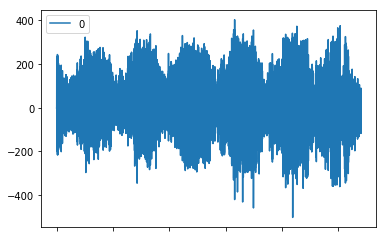

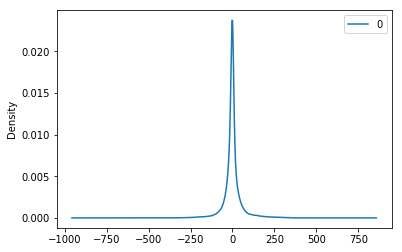

                  0
count  53999.000000
mean       0.000016
std       53.879736
min     -503.539431
25%      -14.319640
50%       -1.276008
75%       10.178539
max      403.420455


In [9]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [10]:
#Rolling Forecast ARIMA Model
X = series.sample(1000).values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [11]:
print("RMSE: %.2f"
  % sqrt(mean_squared_error(test[:1000], predictions[:1000])))
print("MAPE: %.2f"
      % mean_absolute_percentage_error(test[:1000], predictions[:1000])+'%')
print("R2: %.2f"
      % r2_score(test[:1000], predictions[:1000]))
print("MAE: %.2f"
      % mean_absolute_error(test[:1000], predictions[:1000]))

RMSE: 90.93
MAPE: 700.66%
R2: -0.23
MAE: 59.08


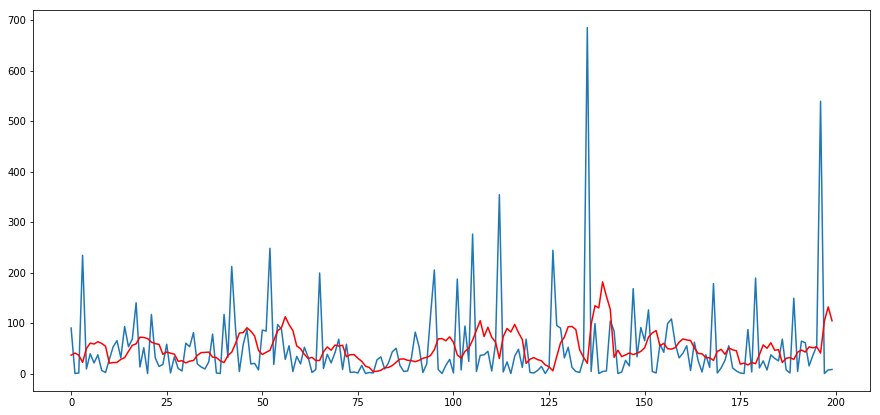

In [12]:
plt.figure(figsize=(15,7))
plt.plot(test[:200])
plt.plot(predictions[:200], color='red')
plt.show()

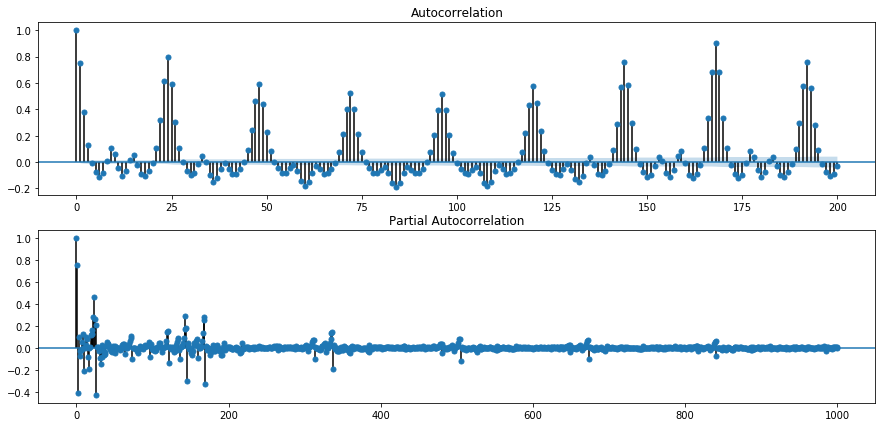

In [13]:
import statsmodels.api as sm

fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series, lags=200, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=1000, ax=ax2)
plt.show()

In [14]:
# grid search sarima hyperparameters for monthly mean temp dataset
#https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/

from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv

In [ ]:
#Grid Search
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[12]):
    models = list()
    # define config lists
    p_params = [0, 1]
    d_params = [0, 1]
    q_params = [0, 1]
    t_params = ['n']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

if __name__ == '__main__':
    # load dataset
    data = series.values
    # data split
    n_test = 12
    # model configs
    cfg_list = sarima_configs(seasonal=[12])
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

In [30]:
#Rolling Forecast SARIMA Model
Xs = series.sample(1000).values
size = int(len(X) * 0.66)
trains, tests = Xs[0:size], Xs[size:len(X)]
historys = [x for x in trains]
predictionss = []
for t in range(len(tests)):
    models = SARIMAX(historys, trend='n', order=(0,1,0), seasonal_order=(2,0,0,12))
    models_fit = models.fit()
    outputs = models_fit.forecast()
    yhats = outputs[0]
    predictionss.append(yhats)
    obss = tests[t]
    historys.append(obss)
    print(yhats,obss)
error = mean_squared_error(tests, predictionss)
print('Test MSE: %.3f' % error)

9.67642194226395 64.0
63.20402267475298 27.0
17.126893263765055 17.0
27.204024477494436 13.0
-5.916985529224048 64.0
69.36304309971281 98.0
109.32369057413425 71.0
71.44544115294102 2.0
2.3340129989042024 53.0
52.831597882486996 4.0
2.1997445868016987 57.0
60.702265931114646 275.0
271.3731909271462 172.0
177.78018572428903 19.0
29.93577630020442 117.0
103.44637813688459 87.0
105.4661602513999 135.0
128.7991681816593 57.0
45.19326953594927 10.0
9.809617607569836 143.0
142.83740438834766 13.0
12.791591919937439 3.0
2.532759432844667 38.0
25.552951099369327 23.0
30.73802439792319 49.0
54.014289840166015 63.0
57.900842232737666 2.0
2.966357316964754 3.0
3.3758092273907008 73.0
78.64307368139889 37.0
37.56409639549534 52.0
41.89569436115728 45.0
53.885194295893044 88.0
85.83100053428939 9.0
10.160277022879406 55.0
68.09976937382893 7.0
-0.22688545713792863 319.0
311.40854220243904 39.0
47.280133880878566 40.0
38.15820666791228 16.0
15.28807959835133 0.0
-3.0035669395850535 63.0
59.692317852

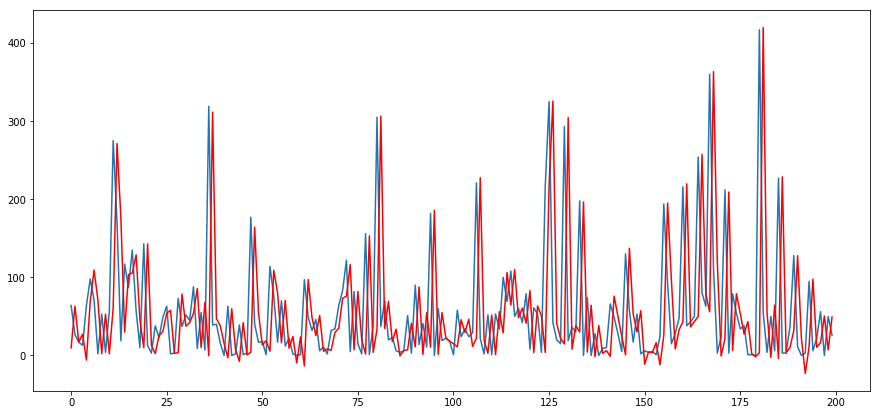

In [31]:
plt.figure(figsize=(15,7))
plt.plot(tests[:200])
plt.plot(predictionss[:200], color='red')
plt.show()

In [32]:
print("RMSE: %.2f"
  % sqrt(mean_squared_error(test[:1000], predictions[:1000])))
print("MAPE: %.2f"
      % mean_absolute_percentage_error(test[:1000], predictions[:1000])+'%')
print("R2: %.2f"
      % r2_score(test[:1000], predictions[:1000]))
print("MAE: %.2f"
      % mean_absolute_error(test[:1000], predictions[:1000]))

RMSE: 110.15
MAPE: 652.41%
R2: -0.95
MAE: 70.24


In [18]:
#!pip install xgboost

In [ ]:
from tpot import TPOTRegressor

pipeline_optimizer = TPOTRegressor(generations=20, population_size=20, cv=3,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV, LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# Average CV score on the training set was:-659.3627611178482
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=False)),
    StackingEstimator(estimator=RandomForestRegressor(bootstrap=True, max_features=0.25, min_samples_leaf=1, min_samples_split=9, n_estimators=100)),
    ElasticNetCV(l1_ratio=0.7000000000000001, tol=0.001)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
printMetrics(results)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/tpot/builtins/stacking_estimator.py:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

RMSE: 23.94
MAPE: 60.05%
R2: 0.92
MAE: 13.26


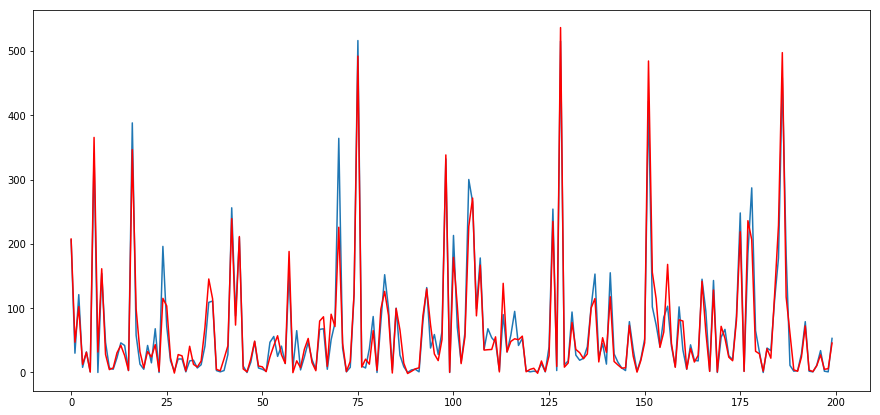

In [48]:
plt.figure(figsize=(15,7))
plt.plot(y_test.head(200).values)
plt.plot(results[:200], color='red')
plt.show()

In [20]:
#!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [21]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 4 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,"21 days, 21 hours and 18 minutes"
H2O cluster name:,osamuyanagano
H2O cluster total nodes:,1
H2O cluster free memory:,3.975 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [37]:
h2o_train_df = pd.concat([y_train,X_train],axis = 1)

h2o_train = h2o.H2OFrame(h2o_train_df)
h2o_train.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:29362
Cols:42




,east_side,temperature,humidity,pressure,wind_direction,wind_speed,work_status,hour_0.0,hour_1.0,hour_10.0,hour_11.0,hour_12.0,hour_13.0,hour_14.0,hour_15.0,hour_16.0,hour_17.0,hour_18.0,hour_19.0,hour_2.0,hour_20.0,hour_21.0,hour_22.0,hour_23.0,hour_3.0,hour_4.0,hour_5.0,hour_6.0,hour_7.0,hour_8.0,hour_9.0,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,season_Fall,season_Spring,season_Summer,season_Winter
type,real,real,real,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,-9.370000000000005,13.0,980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,56.52445970202171,11.312483588874592,77.14883132761895,1021.1493331797469,162.42926231183162,2.124787139840617,0.6858524623663238,0.04192493699339282,0.04107349635583407,0.04161841836387167,0.04298072338396567,0.04151624548736462,0.04229957087391867,0.041311899734350524,0.04219739799741162,0.04107349635583407,0.04148218786186227,0.04216334037190927,0.04267420475444452,0.04103943873033172,0.04206116749540222,0.04127784210884817,0.04161841836387167,0.04120972685784347,0.04168653361487637,0.04100538110482937,0.041311899734350524,0.04240174375042572,0.041754648865881074,0.04107349635583407,0.04124378448334582,0.14144131871125945,0.1443362168789592,0.1417478373407806,0.1442681016279545,0.1405898780737007,0.1433826033648934,0.14423404400245216,0.16814249710510185,0.16582657857094205,0.25253729309992506,0.41349363122403104
maxs,717.0,34.0,100.0,1058.0,360.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,81.77695005816022,6.58604685612873,18.175735529649298,9.73391082007468,102.85731631120522,1.6085622446126326,0.4641833694775581,0.20042106850026684,0.19846361305810575,0.19971901285698498,0.20281711405684877,0.199484340581459,0.20127517708352122,0.1990140085034419,0.20104266747637695,0.19846361305810575,0.19940604348311783,0.20096509295109694,0.20212498215353736,0.19838483709561502,0.20073215482773213,0.19893549130671298,0.199719012856985,0.19877834636435018,0.19987527895295343,0.19830602399046574,0.1990140085034419,0.20150736660153173,0.20003139977709114,0.19846361305810575,0.19885693727490572,0.3484821487881153,0.3514363096601164,0.34879726401557526,0.3513673593288507,0.34760391164085547,0.35046856585800806,0.351332874136409,0.3739991465164658,0.3719312244196635,0.43447512898353247,0.49246817966614576
zeros,1190,4,0,0,2022,2871,9224,28131,28156,28140,28100,28143,28120,28149,28123,28156,28144,28124,28109,28157,28127,28150,28140,28152,28138,28158,28149,28117,28136,28156,28151,25209,25124,25200,25126,25234,25152,25127,24425,24493,21947,17221
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2.0,4.163499999999999,100.0,1037.0,75.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20.0,4.010000000000049,75.0,1017.0,85.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,19.0,7.8735000000000355,99.0,1026.0,187.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml.train(x= list(X_train.columns), y = 'west_side', training_frame= h2o_train)

In [40]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
aml_leaderboard_df

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,StackedEnsemble_AllModels_AutoML_20181214_044937,610.798416,24.714336,610.798416,13.572719,NaN
1,StackedEnsemble_BestOfFamily_AutoML_20181214_0...,622.599897,24.951952,622.599897,13.617491,NaN
2,XGBoost_2_AutoML_20181214_044937,624.291777,24.985832,624.291777,13.739135,NaN
3,XGBoost_1_AutoML_20181214_044937,629.165614,25.083174,629.165614,14.229641,NaN
4,XRT_1_AutoML_20181214_044937,669.727878,25.879101,669.727878,14.255596,0.605287
5,DRF_1_AutoML_20181214_044937,670.066152,25.885636,670.066152,14.211585,0.605867
6,GLM_grid_1_AutoML_20181214_044937_model_1,2411.222196,49.104197,2411.222196,30.884585,NaN


In [41]:
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
mod_best

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20181214_044937
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 275.79064670395155
RMSE: 16.60694573676784
MAE: 9.889019578203204
RMSLE: NaN
R^2: 0.9588827207190094
Mean Residual Deviance: 275.79064670395155
Null degrees of freedom: 26403
Residual degrees of freedom: 26399
Null deviance: 177102579.8133854
Residual deviance: 7281976.235571137
AIC: 223324.33478810222

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 548.8516519973001
RMSE: 23.42758314460329
MAE: 13.294246125200347
RMSLE: NaN
R^2: 0.9156543439419962
Mean Residual Deviance: 548.8516519973001
Null degrees of freedom: 2957
Residual degrees of freedom: 2953
Null deviance: 19248214.0251122
Residual deviance: 1623503.1866080137
AIC: 27064.996148617778

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validatio

In [50]:
h2o_test = h2o_train = h2o.H2OFrame(pd.concat([X_test,y_test],axis = 1))
mod_perf = mod_best.model_performance(h2o_test)
mod_perf

Parse progress: |█████████████████████████████████████████████████████████| 100%

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 556.4726898428597
RMSE: 23.58967337295834
MAE: 13.245630663362125
RMSLE: NaN
R^2: 0.9176283864779679
Mean Residual Deviance: 556.4726898428597
Null degrees of freedom: 14462
Residual degrees of freedom: 14458
Null deviance: 97708000.64112057
Residual deviance: 8048264.51319728
AIC: 132485.77851448505


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed', 'work_status', 'hour_0.0', 'hour_1.0', 'hour_10.0', 'hour_11.0', 'hour_12.0', 'hour_13.0', 'hour_14.0', 'hour_15.0', 'hour_16.0', 'hour_17.0', 'hour_18.0', 'hour_19.0', 'hour_2.0', 'hour_20.0', 'hour_21.0', 'hour_22.0', 'hour_23.0', 'hour_3.0', 'hour_4.0', 'hour_5.0', 'hour_6.0', 'hour_7.0', 'hour_8.0', 'hour_9.0', 'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Sat', 'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue', 'day_of_week_Wed', 'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']
Optimal number of features : 41


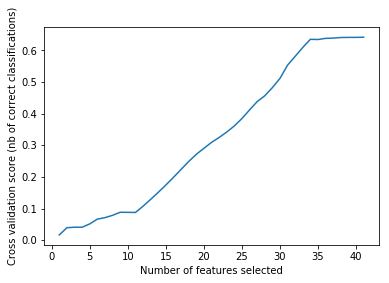

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
import warnings

# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Create the RFE object and compute a cross-validated score.
lr = LinearRegression()
rfecv = RFECV(estimator=lr, step=1, scoring='r2')

# Fit recursive feature eliminator 
rfecv.fit(X_train, y_train)

X_train.columns[rfecv.get_support(indices=True)]

# 1st way to get the list
vector_names = list(X_train.columns[rfecv.get_support(indices=True)])
print(vector_names)

print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [52]:
from sklearn.metrics import r2_score
lr.fit(X_train,y_train)

# Apply The Full Featured Classifier To The Test Data
y_pred = lr.predict(X_test)

# View The Accuracy Of Our Full Feature (42 Features) Model
r2_score(y_test, y_pred)

0.6557456238927811

In [54]:
!conda install -c conda-forge Skater --yes

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - skater


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.11.29         |        py36_1000         145 KB  conda-forge
    ca-certificates-2018.11.29 |       ha4d7672_0         143 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         288 KB

The following packages will be UPDATED:

    ca-certificates: 2018.10.15-ha4d7672_0 conda-forge --> 2018.11.29-ha4d7672_0 conda-forge
    certifi:         2018.10.15-py36_1000  conda-forge --> 2018.11.29-py36_1000  conda-forge


certifi-2018.11.29   | 145 KB    | ##################################### | 100% 
ca-certificates-2018 | 143 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: don

In [98]:
def understanding_interaction():
    # ['worst area', 'mean perimeter'] --> list(feature_selection.value)
    interpreter.partial_dependence.plot_partial_dependence(list(feature_selection.value),
                                                                pyint_model, 
                                                                grid_resolution=grid_resolution.value, 
                                                                with_variance=True)

In [102]:
import ipywidgets as widgets
from ipywidgets import Layout
from IPython.display import display
from IPython.display import clear_output
grid_resolution = widgets.IntSlider(description="GR", 
                                    value=10, min=10, max=100)
display(grid_resolution)

# dropdown to select relevant features from the dataset
feature_selection = widgets.SelectMultiple(
    options=tuple(X_train.columns.values),
    description='Features',
    layout=widgets.Layout(display="flex", flex_flow='column', align_items = 'stretch'),
    disabled=False,
    multiple=True
)
display(feature_selection)

IntSlider(value=10, description='GR', min=10)

SelectMultiple(description='Features', layout=Layout(align_items='stretch', display='flex', flex_flow='column'…

In [103]:
button = widgets.Button(description="Generate Interactions")
display(button)

def on_button_clicked(button_func_ref):
    clear_output()
    understanding_interaction()

button.on_click(on_button_clicked)

In [95]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from IPython.display import display, HTML, clear_output

def on_value_change(change):
    index = 33
    exp = LimeTabularExplainer(X_test, 
                           feature_names=data.feature_names, 
                           class_names=[])
    print("Model behavior at row: {}".format(index))
    # Lets evaluate the prediction from the model and actual target label
    print("prediction from the model:{}".format(eclf.predict(X_test[index].reshape(1, -1))))
    print("Target Label on the row: {}".format(y_test.reshape(1,-1)[0][index]))
    clear_output()
    display(HTML(exp.explain_instance(X_test[index], models['ensemble'].predict_proba).as_html()))